In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
clean_data = data.dropna()
clean_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
clean_data = clean_data.drop(["Name", "Ticket", "Cabin"], axis=1)

In [5]:
print("Sex:", clean_data["Sex"].unique())
print("Embarked:", clean_data["Embarked"].unique())

Sex: ['female' 'male']
Embarked: ['C' 'S' 'Q']


In [6]:
clean_data["Sex"] = clean_data["Sex"].map({'male': 0, 'female': 1})
print("Sex:", clean_data["Sex"].unique())
clean_data["Embarked"] = clean_data['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})
print("Embarked:", clean_data["Embarked"].unique())

Sex: [1 0]
Embarked: [1 3 2]


In [7]:
clean_data.drop(["PassengerId"], axis=1, inplace=True)

In [8]:
loss = (1 - clean_data.shape[0] * clean_data.shape[1] / data.shape[0] / data.shape[1]) * 100

print(f"Процент потерянных данных: {loss}%")

Процент потерянных данных: 86.30751964085297%


In [9]:
X = clean_data.drop(columns=['Survived'])
y = clean_data['Survived']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import recall_score, precision_score, f1_score
import seaborn as sns

In [27]:
def train_and_show(clf, model):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_probs = clf.predict_proba(X_test)

    print(model)
    print(f"Accurracy: {accuracy_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"F1: {f1_score(y_test, y_pred)}")

    fig, axs = plt.subplots(1, 3, figsize=(16, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), ax=axs[0])
    axs[0].set_title("Error Matrix Heatmap")

    precision, recall, _ = precision_recall_curve(y_test, y_pred_probs[:,1])
    axs[1].plot(precision, recall)
    axs[1].set_xlabel("Precision")
    axs[1].set_ylabel("Recall")
    axs[1].set_title("PR Curve")

    tpr, fpr, _ = roc_curve(y_test, y_pred_probs[:,1])
    axs[2].plot(tpr, fpr)
    axs[2].set_xlabel("TPR")
    axs[2].set_ylabel("FPR")
    axs[2].set_title("ROC Curve")

LogisticRegression
Accurracy: 0.7454545454545455
Recall: 0.8648648648648649
Precision: 0.7804878048780488
F1: 0.8205128205128205


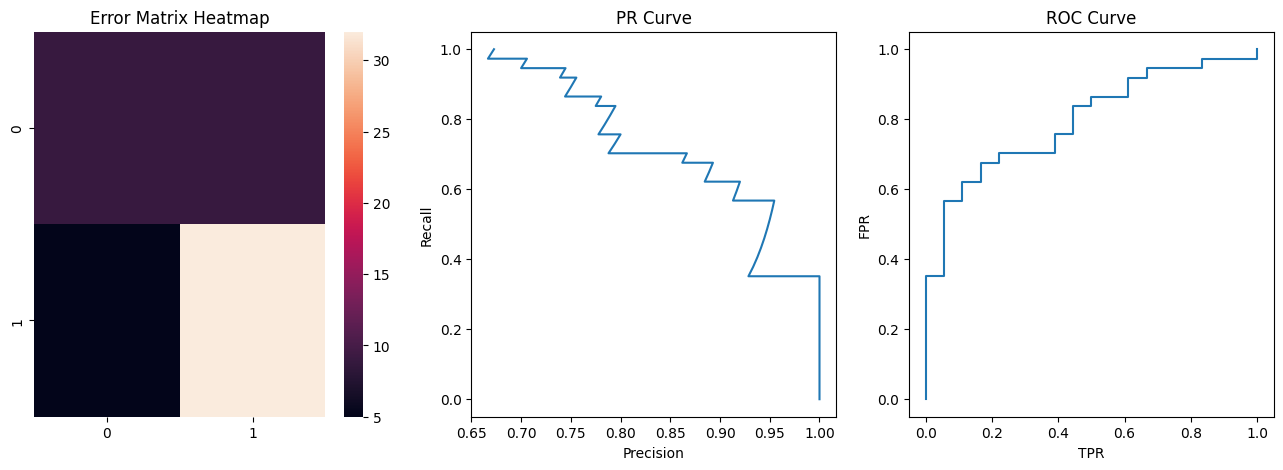

In [28]:
from sklearn.linear_model import LogisticRegression
train_and_show(LogisticRegression(max_iter = 1000, random_state=0), "LogisticRegression")

Модель угадывает примерно 75% ответов. F1=82% показывает хорошее среднее между precision и recall. Кривые получились нормальные, но у PR Curve точность падает при увеличении recall. Модель получилась хорошей

SVC
Accurracy: 0.6909090909090909
Recall: 0.7567567567567568
Precision: 0.7777777777777778
F1: 0.7671232876712328


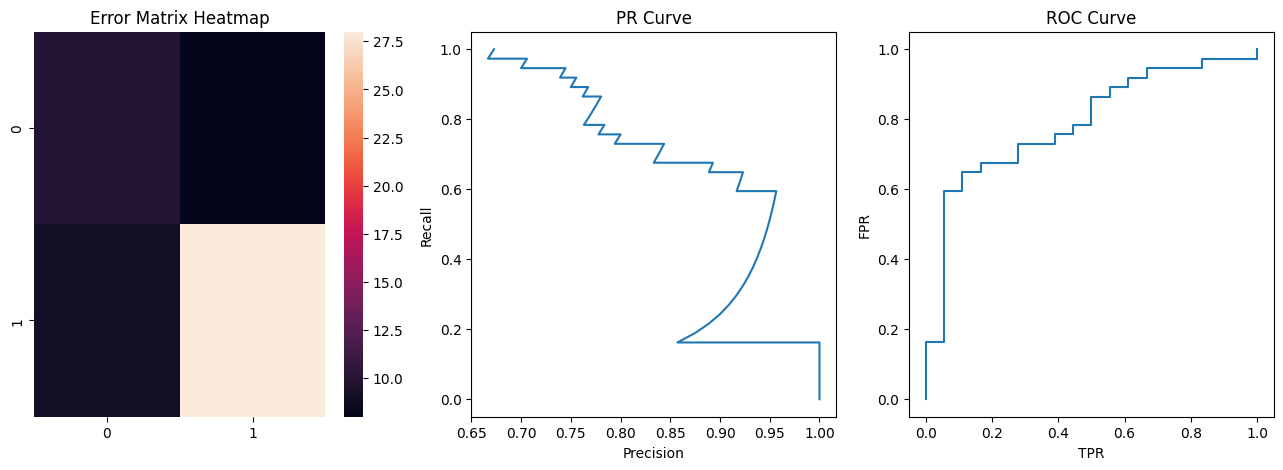

In [29]:
from sklearn.svm import SVC
train_and_show(SVC(kernel='linear', probability=True), "SVC")

Модель хуже предсказывает 0, это видно на тепловой карте. PR кривая менее стабильная, чем в первом случае

KNeighborsClassifier
Accurracy: 0.6727272727272727
Recall: 0.918918918918919
Precision: 0.6938775510204082
F1: 0.7906976744186046


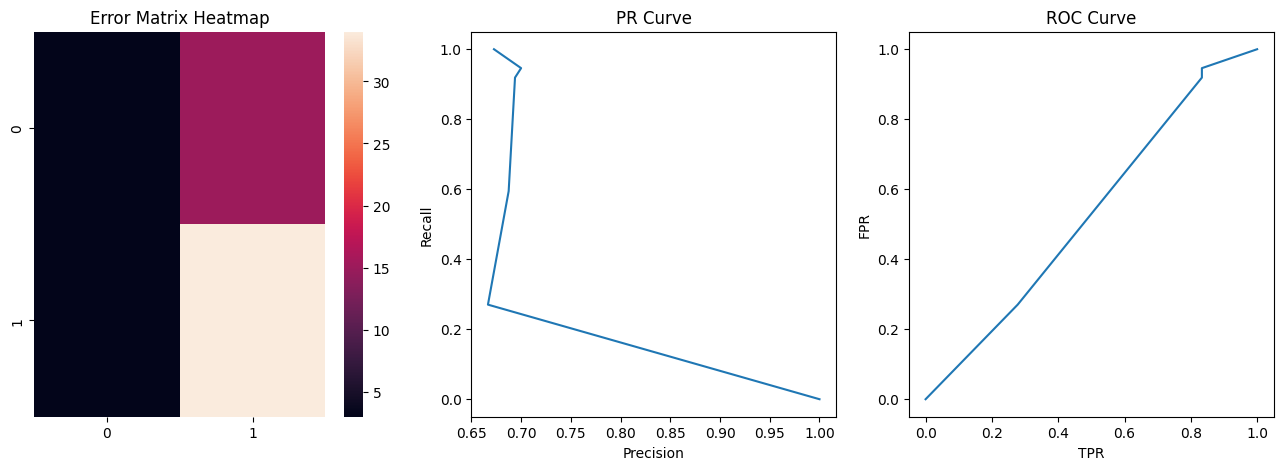

In [30]:
from sklearn.neighbors import KNeighborsClassifier
train_and_show(KNeighborsClassifier(), "KNeighborsClassifier")

Модель показывает результат хуже остальных. Кривые показывают, что модель плохо предсказывает вероятности

Модель, использующая LogisticRegression, показала наилучший результат